# Heterogeneous Agents - Solving the Aiyagari problem - OSE - Tony Smith 

## Jeanne Sorin

### Calibrate the transition probability

In [1]:
import numpy as np
from scipy.optimize import root
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy import interpolate


In [2]:
# Define the employment status
ϵ = np.array((1.0, 0.0))

# Calibrate the transition probability
A = np.array([0.90, 0.1])
Trans= np.array([[0.90,0.10], [0.90, 0.10]] )
Ubar = 0.05
α = 0.36
β = 0.96
δ = 0.06


def rf(k, u):
    r = α*k**(α-1)*(1-u)**(1-α)
    return r
    
def wf(k, u):
    w = (1-α)*k**(α) * (1-u)**(-α)
    return w

# Define the FOC of the HH

def utility(c):
    U = 0
    if c > 0:
        U = np.log(c)
    if c <= 0:
        U = -99999999
    return U

def uprime(c):
    Up = -1/(c)
    return Up

'''
From the intertemporal EE, and the the definition of k and w as a function of k
'''

def find_K_SS(α, β, δ, u):
    k_ss = ((1/β - 1 + δ) / (α*(1 - u) **(1-α))) ** (1 / (α-1)) 
    return(k_ss)

Kss = find_K_SS(α, β, δ, Ubar)
Kss

    

6.850617572969538

### Compute the steady state equilibrium value of aggregate capital kss*

#### 1. Guess on kss from the representative-agent economy in ss

In [3]:
def interpolant(x,Kgrid,Vp):
    t = interpolate.interp1d(Kgrid,Vp,fill_value="extrapolate")
    return t(x)


def Bellman(kp, *params):
    r, w, Kgrid, Vp, ϵ, ik, ie, Trans = params
    #print("Before U")
    today = utility(r*Kgrid[ik] + w*ϵ[ie] + (1-δ)*Kgrid[ik] - kp)
    #print("Computed utility ", today)
    
    fut = 0
    #print("Computing future")
    for i in range(Nϵ):
        #print("fut is ", fut)
        fut +=  Trans[ie,i]*interpolant(kp,Kgrid,Vp[:,i])  
        
    #print("Computed future ", fut)

    Value = today + β * fut
    #print("Computed total")
    
    
    '''
    You would like to keep tract of when c < 0 and you set u = -99999999 ?
    Maybe this could explain why the policy function is below the 45 degree line.
    '''
    
    return - Value



#### 2. Restrict k to lie on a grid of N = 200 points in the interval [0.001, 40] and then iterate on the Bellman equation to find v(k, e, kss) at each of the pairs in k*e

Use value function iteration for the policy function to know how k' depends on k.

In [4]:
n = 50
Nϵ = 2
tol = 1e-6
ϵ = np.array([1.,0.])
maxiter = 2000

# Make Grid


Klow = 0.01
Khigh = 40.

Kgrid = np.linspace(Klow, Khigh, n)


Vp = Klow*np.ones([n, Nϵ])
Kp= Klow*np.ones([n, Nϵ])
Vp_new = np.zeros([n, Nϵ])
Kp_new = np.zeros([n, Nϵ])



#### Run function

iter = 0
epsi = 1

r = rf(Kss, Ubar)
w = wf(Kss, Ubar) 

while (epsi > tol) & (iter < maxiter):
    
    
    for ik in range(n):
        
        for ie in range(Nϵ):
            
            params1 = r, w, Kgrid, Vp, ϵ, ik, ie, Trans
            Solve = minimize(Bellman, Kp[ik, ie], args=(params1))
            Kp_new[ik, ie] = Solve.x
            Vp_new[ik, ie] = - Solve.fun
        

    iter += 1

    epsi = ((Vp_new - Vp) ** 2).sum()
    print("Error term: ", epsi)
    if epsi < tol:
        break
    #Update
    Kp = Kp_new*1.
    Vp = Vp_new*1.
    iter=iter+1

    

        

Error term:  14000.18885280524
Error term:  617.947953625325
Error term:  205.9750913731638
Error term:  132.3251291368598
Error term:  110.5994286762081
Error term:  101.47954348876209
Error term:  93.52353348930386
Error term:  86.19127520554179
Error term:  79.43386648245936
Error term:  73.20623909478884
Error term:  67.4668581668799
Error term:  62.17744515806752
Error term:  57.30272256597477
Error term:  52.810178645083845
Error term:  48.6698505713777
Error term:  44.854124606866314
Error term:  41.33755193122211
Error term:  38.09667891220474
Error term:  35.109890682898474
Error term:  32.35726698248865
Error term:  29.820449299116166
Error term:  27.482518428747312
Error term:  25.32788163341646
Error term:  23.34216864627277
Error term:  21.512135829828043
Error term:  19.825577848191813
Error term:  18.271246264212987
Error term:  16.838774518601607
Error term:  15.51860879069107
Error term:  14.301944279715464
Error term:  13.180666481635788
Error term:  12.14729706986013

Policy Function [[-11.74259501 -13.04472995]
 [-10.89125276 -12.19467381]
 [-10.04108795 -11.34520367]
 [ -9.19169999 -10.49437832]
 [ -8.34089381  -9.64346998]
 [ -7.49167272  -8.7940743 ]
 [ -6.64066235  -7.94396032]
 [ -5.79045559  -7.09396527]
 [ -4.94035345  -6.24318903]
 [ -4.09018622  -5.39429689]
 [ -3.24003965  -4.54352734]
 [ -2.38976015  -3.69313115]
 [ -1.5399336   -2.84313096]
 [ -0.68980296  -1.99306743]
 [  0.16045163  -1.14293592]
 [  1.01209544  -0.29259902]
 [  1.86064106   0.55717872]
 [  2.71060916   1.40775082]
 [  3.5609472    2.2586923 ]
 [  4.41111911   3.10729366]
 [  5.26179173   3.95784138]
 [  6.11188836   4.80803592]
 [  6.96182715   5.65869008]
 [  7.81171754   6.50876825]
 [  8.661717     7.35842775]
 [  9.5119477    8.20848087]
 [ 10.36214991   9.05834649]
 [ 11.21077615   9.90862014]
 [ 12.06218035  10.75966151]
 [ 12.91253023  11.60909804]
 [ 13.76313566  12.4590965 ]
 [ 14.61251353  13.30941545]
 [ 15.46264254  14.15935937]
 [ 16.31219411  15.00937805

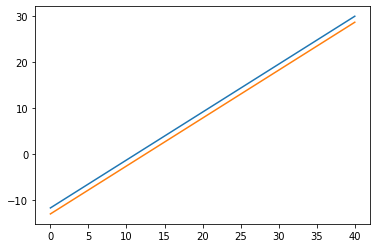

Value Function [[41.48374587 41.38390951]
 [41.54886532 41.44902895]
 [41.61398476 41.51414839]
 [41.6791042  41.57926784]
 [41.74422364 41.64438728]
 [41.80934308 41.70950672]
 [41.87446252 41.77462616]
 [41.93958196 41.8397456 ]
 [42.00470141 41.90486504]
 [42.06982085 41.96998448]
 [42.13494029 42.03510393]
 [42.20005973 42.10022337]
 [42.26517917 42.16534281]
 [42.33029861 42.23046225]
 [42.39541806 42.29558169]
 [42.46053749 42.36070113]
 [42.52565693 42.42582057]
 [42.59077637 42.49094001]
 [42.6558958  42.55605944]
 [42.72101524 42.62117888]
 [42.78613468 42.68629832]
 [42.85125411 42.75141776]
 [42.91637355 42.81653719]
 [42.98149298 42.88165663]
 [43.04661242 42.94677606]
 [43.11173186 43.0118955 ]
 [43.17685129 43.07701494]
 [43.24197072 43.14213437]
 [43.30709016 43.20725381]
 [43.37220959 43.27237324]
 [43.43732902 43.33749268]
 [43.50244845 43.40261211]
 [43.56756788 43.46773154]
 [43.63268731 43.53285097]
 [43.69780675 43.5979704 ]
 [43.76292618 43.66308982]
 [43.82804561

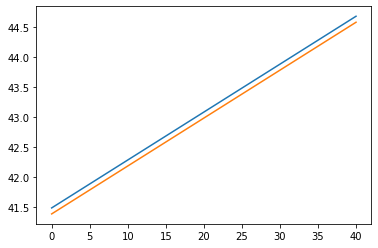

In [5]:
print("Policy Function",Kp)
plt.plot(Kgrid, Kp[:,0])
plt.plot(Kgrid, Kp[:,1])
plt.show()
print("Value Function",Vp)
plt.plot(Kgrid, Vp[:,0])
plt.plot(Kgrid, Vp[:,1])
plt.show()

Error term:  9.497682422295863e-07
Policy Function [[-11.74259501 -13.04472995]
 [-10.89125276 -12.19467381]
 [-10.04108795 -11.34520367]
 [ -9.19169999 -10.49437832]
 [ -8.34089381  -9.64346998]
 [ -7.49167272  -8.7940743 ]
 [ -6.64066235  -7.94396032]
 [ -5.79045559  -7.09396527]
 [ -4.94035345  -6.24318903]
 [ -4.09018622  -5.39429689]
 [ -3.24003965  -4.54352734]
 [ -2.38976015  -3.69313115]
 [ -1.5399336   -2.84313096]
 [ -0.68980296  -1.99306743]
 [  0.16045163  -1.14293592]
 [  1.01209544  -0.29259902]
 [  1.86064106   0.55717872]
 [  2.71060916   1.40775082]
 [  3.5609472    2.2586923 ]
 [  4.41111911   3.10729366]
 [  5.26179173   3.95784138]
 [  6.11188836   4.80803592]
 [  6.96182715   5.65869008]
 [  7.81171754   6.50876825]
 [  8.661717     7.35842775]
 [  9.5119477    8.20848087]
 [ 10.36214991   9.05834649]
 [ 11.21077615   9.90862014]
 [ 12.06218035  10.75966151]
 [ 12.91253023  11.60909804]
 [ 13.76313566  12.4590965 ]
 [ 14.61251353  13.30941545]
 [ 15.46264254  14.15

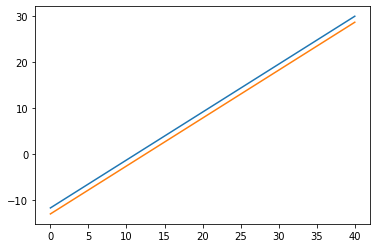

Value Function [[41.48374587 41.38390951]
 [41.54886532 41.44902895]
 [41.61398476 41.51414839]
 [41.6791042  41.57926784]
 [41.74422364 41.64438728]
 [41.80934308 41.70950672]
 [41.87446252 41.77462616]
 [41.93958196 41.8397456 ]
 [42.00470141 41.90486504]
 [42.06982085 41.96998448]
 [42.13494029 42.03510393]
 [42.20005973 42.10022337]
 [42.26517917 42.16534281]
 [42.33029861 42.23046225]
 [42.39541806 42.29558169]
 [42.46053749 42.36070113]
 [42.52565693 42.42582057]
 [42.59077637 42.49094001]
 [42.6558958  42.55605944]
 [42.72101524 42.62117888]
 [42.78613468 42.68629832]
 [42.85125411 42.75141776]
 [42.91637355 42.81653719]
 [42.98149298 42.88165663]
 [43.04661242 42.94677606]
 [43.11173186 43.0118955 ]
 [43.17685129 43.07701494]
 [43.24197072 43.14213437]
 [43.30709016 43.20725381]
 [43.37220959 43.27237324]
 [43.43732902 43.33749268]
 [43.50244845 43.40261211]
 [43.56756788 43.46773154]
 [43.63268731 43.53285097]
 [43.69780675 43.5979704 ]
 [43.76292618 43.66308982]
 [43.82804561

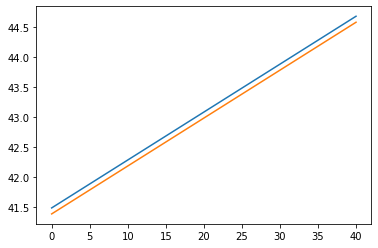

ϵ =  [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0]
New value function for kstar nan
error term for simulation for kss nan


/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
### Simulation of the shock process for an individual

def simulation(kp, t_simu, trans, kss, kgrid):
    
    np.random.seed(seed=198)
    ϵ = np.random.binomial(1, trans[0, 1], t_simu)
    print("ϵ = ",ϵ)
    
    ksimu = np.ones([t_simu])
    ksimu[0] = kss*3
    
    for t in range(1, t_simu):
        ksimu[t] = interpolant(ksimu[t-1], kgrid, kp[:,ϵ[t]])
        if ksimu[t] < 0:
            ksimu[t] = 0
            
    kss_new = np.mean(ksimu[500:])
    
    return kss_new


### Run the value function iteration with the simulation of t periods
epsi_simu = 1
iter_simu = 0
simuT = 50


while (epsi_simu > tol) & (iter_simu < maxiter):

    iter = 0
    epsi = 1

    r = rf(Kss, Ubar)
    w = wf(Kss, Ubar) 


    while (epsi > tol) & (iter < maxiter):


        for ik in range(n):

            for ie in range(Nϵ):

                params1 = r, w, Kgrid, Vp, ϵ, ik, ie, Trans
                Solve = minimize(Bellman, Kp[ik, ie], args=(params1))
                Kp_new[ik, ie] = Solve.x
                Vp_new[ik, ie] = - Solve.fun

        iter += 1

        epsi = ((Vp_new - Vp) ** 2).sum()
        print("Error term: ", epsi)
        if epsi < tol:
            break
        #Update
        Kp = Kp_new*1.
        Vp = Vp_new*1.
        iter=iter+1
        
    print("Policy Function",Kp)
    plt.plot(Kgrid, Kp[:,0])
    plt.plot(Kgrid, Kp[:,1])
    plt.show()
    print("Value Function",Vp)
    plt.plot(Kgrid, Vp[:,0])
    plt.plot(Kgrid, Vp[:,1])
    plt.show()
    
    # Simulation
    kss_n = simulation(Kp, simuT, Trans, Kss, Kgrid)
    print("New value function for kstar", kss_n)
    epsi_simu = (kss_n - Kss) **2
    print("error term for simulation for kss", epsi_simu)
    Kss = kss_n
    
    iter_simu += iter_simu

There must be an issue in the value function iteration, as the policy function never is above the 45 degree line, suggesting that people never accumulate capital.
This drives the time iteration to return a NaN value.